# **Experiment-15**

### Objective: 
Write a program to perform Sentiment Analysis of hotel reviews using SentiWordNet.

### Dataset:
https://www.kaggle.com/datasets/datafiniti/hotel-reviews

In [25]:
%pip install nltk pandas matplotlib 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import nltk
from nltk.corpus import stopwords,  sentiwordnet as swn
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
import pandas as pd

nltk.download('punkt', download_dir="C:/nltk_data")
nltk.download('stopwords', download_dir="C:/nltk_data")
nltk.download('averaged_perceptron_tagger', download_dir="C:/nltk_data")
nltk.download('wordnet', download_dir="C:/nltk_data")
nltk.download('sentiwordnet', download_dir="C:/nltk_data")


[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to C:/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [27]:
# Load the dataset (replace 'hotel_reviews.csv' with your actual file path)
file_path = 'hotel_reviews.csv'
hotel_reviews_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Sample Data:")
hotel_reviews_df.head()

Sample Data:


,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [28]:
reviews = hotel_reviews_df["reviews.text"].dropna().tolist()

# Display the first few reviews
reviews[:5]

["Pleasant 10 min walk along the sea front to the Water Bus. restaurants etc. Hotel was comfortable breakfast was good - quite a variety. Room aircon didn't work very well. Take mosquito repelant!",
 "Really lovely hotel. Stayed on the very top floor and were surprised by a Jacuzzi bath we didn't know we were getting! Staff were friendly and helpful and the included breakfast was great! Great location and great value for money. Didn't want to leave!",
 'Ett mycket bra hotell. Det som drog ner betyget var att vi fick ett rum under taksarna dr det endast var full sthjd i 80 av rummets yta.',
 'We stayed here for four nights in October. The hotel staff were welcoming, friendly and helpful. Assisted in booking tickets for the opera. The rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. Beds were comfortable. Plenty of choice for breakfast.Spa at hotel nearby which we used while we were there.',
 'We stayed here for four nights in October.

In [29]:
stop_words = set(stopwords.words("english"))
punctuation = set(string.punctuation)

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    return filtered_tokens

# Preprocess the reviews
preprocessed_reviews = [preprocess_text(review) for review in reviews]
preprocessed_reviews[:5]

[['pleasant',
  '10',
  'min',
  'walk',
  'along',
  'sea',
  'front',
  'water',
  'bus',
  'restaurants',
  'etc',
  'hotel',
  'comfortable',
  'breakfast',
  'good',
  'quite',
  'variety',
  'room',
  'aircon',
  "n't",
  'work',
  'well',
  'take',
  'mosquito',
  'repelant'],
 ['really',
  'lovely',
  'hotel',
  'stayed',
  'top',
  'floor',
  'surprised',
  'jacuzzi',
  'bath',
  "n't",
  'know',
  'getting',
  'staff',
  'friendly',
  'helpful',
  'included',
  'breakfast',
  'great',
  'great',
  'location',
  'great',
  'value',
  'money',
  "n't",
  'want',
  'leave'],
 ['ett',
  'mycket',
  'bra',
  'hotell',
  'det',
  'som',
  'drog',
  'ner',
  'betyget',
  'var',
  'att',
  'vi',
  'fick',
  'ett',
  'rum',
  'taksarna',
  'dr',
  'det',
  'endast',
  'var',
  'full',
  'sthjd',
  '80',
  'av',
  'rummets',
  'yta'],
 ['stayed',
  'four',
  'nights',
  'october',
  'hotel',
  'staff',
  'welcoming',
  'friendly',
  'helpful',
  'assisted',
  'booking',
  'tickets',
  

In [30]:
def calculate_sentiment_score(tokens):
    pos_score = 0
    neg_score = 0
    count = 0

    for word in tokens:
        synsets = list(swn.senti_synsets(word))
        if synsets:
            # Take the first synset as it is the most common usage
            sentiment = synsets[0]
            pos_score += sentiment.pos_score()
            neg_score += sentiment.neg_score()
            count += 1

    if count == 0:
        return 0  # Neutral if no sentiment words are found

    # Calculate the average sentiment score
    sentiment_score = pos_score - neg_score
    return sentiment_score

# Calculate sentiment scores for each review
sentiment_scores = [calculate_sentiment_score(tokens) for tokens in preprocessed_reviews]

# Display a sample of sentiment scores
sentiment_scores[:5]

[-0.375, 1.75, 0.0, -0.25, -0.25]

In [31]:
def classify_sentiment(score):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

filtered_df = hotel_reviews_df.dropna(subset=["reviews.text"]).copy()
sentiment_labels = [classify_sentiment(score) for score in sentiment_scores]
filtered_df["Sentiment"] = sentiment_labels
hotel_reviews_df["Sentiment"] = filtered_df["Sentiment"]
hotel_reviews_df[["reviews.text", "Sentiment"]].head()


,reviews.text,Sentiment
0,Pleasant 10 min walk along the sea front to th...,Negative
1,Really lovely hotel. Stayed on the very top fl...,Positive
2,Ett mycket bra hotell. Det som drog ner betyge...,Neutral
3,We stayed here for four nights in October. The...,Negative
4,We stayed here for four nights in October. The...,Negative


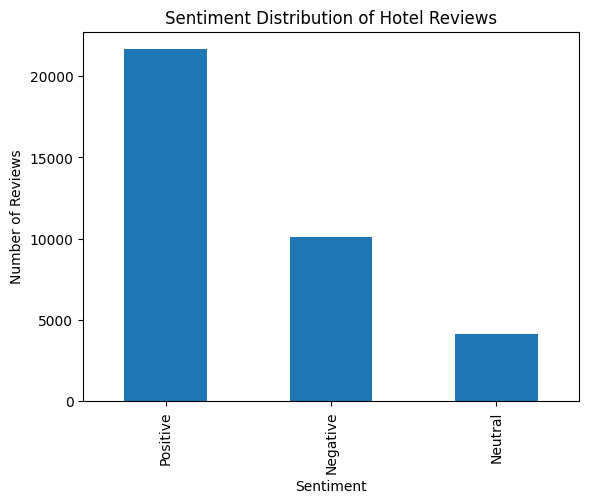

In [32]:
# Plot the sentiment distribution
sentiment_counts = hotel_reviews_df["Sentiment"].value_counts()
sentiment_counts.plot(kind="bar", title="Sentiment Distribution of Hotel Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()